# Coursework 2 Group (text)


Group number: CW2 Group 5

Student names and k-numbers:
1. Bhumika Reddy Kurubarahalli Sudharshan (K2463984)
2. Pragati Priya (K2461276)
3. Reghuram Karunamurthi (K2446531)
4. Shreenidhi Dayanand Shetty (K2455943)


# Load Modules (code)

In [55]:
# Standard libraries
import numpy as np
import pandas as pd

# Third-party libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Scikit-learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# TensorFlow
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import Huber
from tcn import TCN

# 1. Model that processes the data independently at each time instance

# Load Data (code)

In [56]:
# Loading Digits dataset

file_path = "./starbucks_open_7year.csv"
data = pd.read_csv(file_path)

# Visualizing the data

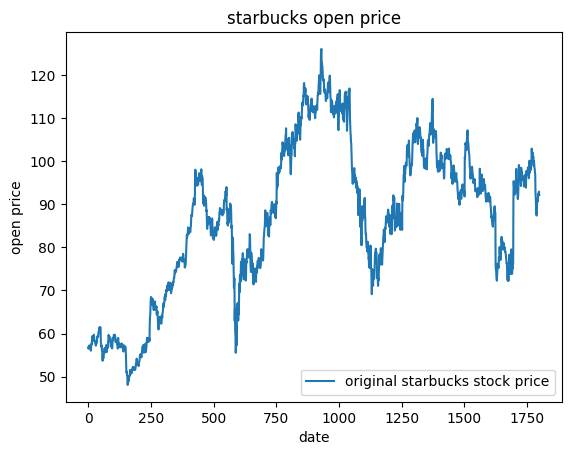

In [57]:
plt.plot(data['Open'], label='original starbucks stock price')
plt.title('starbucks open price')
plt.xlabel('date')
plt.ylabel('open price')
plt.legend()
plt.show()

# Preprocessing the data

In [58]:

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date').reset_index(drop=True)

print(data['Open'])

data['Days'] = (data['Date'] - data['Date'].min()).dt.days
data['Days2'] = data['Days'] ** 2
data['Days3'] = data['Days'] ** 3

# Select features
X = data[['Days', 'Days2', 'Days3']].values.astype(float)
y = data['Open'].values.astype(float)

0       56.81
1       56.47
2       56.82
3       56.92
4       57.24
        ...  
1795    92.40
1796    92.04
1797    92.78
1798    92.97
1799    92.19
Name: Open, Length: 1800, dtype: float64


In [59]:
# Normalization (Min-Max Scaling)
X_min, X_max = X.min(), X.max()
y_min, y_max = y.min(), y.max()

X_normalized = (X - X_min) / (X_max - X_min)
y_normalized = (y - y_min) / (y_max - y_min)

# Defining the Model and Training (code)

In [60]:
# Splitting Data into Training and Testing Sets
split_index = int(len(X_normalized) * 0.8)
X_train, X_test = X_normalized[:split_index], X_normalized[split_index:]
y_train, y_test = y_normalized[:split_index], y_normalized[split_index:]

In [61]:
# Defining the Model

model = Sequential([
    Dense(512, activation='relu', input_dim=X.shape[1]),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation=LeakyReLU(alpha=0.1)),
    Dense(64, activation='relu'),
    Dense(1)
])

/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [62]:
# Train the model
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=10, min_lr=1e-6)

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler])

Epoch 1/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1047 - learning_rate: 0.0010
Epoch 2/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 994us/step - loss: 0.0284 - learning_rate: 0.0010
Epoch 3/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step - loss: 0.0219 - learning_rate: 0.0010
Epoch 4/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0168 - learning_rate: 0.0010
Epoch 5/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154 - learning_rate: 0.0010
Epoch 6/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0132 - learning_rate: 0.0010
Epoch 7/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0136 - learning_rate: 0.0010
Epoch 8/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 - learning_rate: 0.0010
Epoch 9/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0099 - learning_rate: 0.0010
Epoch 10/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0088 - learning_rate: 0.0010
Epoch 11/200
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095 - learning_rate: 0.0010
Epoc

# Predictions And Evaluations

In [63]:
# Predictions
y_pred_normalized = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred = y_pred_normalized * (y_max - y_min) + y_min
y_actual = y_test * (y_max - y_min) + y_min


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [64]:
# Compute evaluation metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
mape = (abs((y_actual - y_pred) / y_pred)).mean() * 100

# Print the results
print(f"Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error): {mae:.4f}")
print(f"MSE  (Mean Squared Error): {mse:.4f}")
print(f"R² Score (R-squared): {r2:.4f}")
print(f"MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

Model Evaluation Metrics:
MAE  (Mean Absolute Error): 7.2772
MSE  (Mean Squared Error): 81.1973
R² Score (R-squared): -0.2032
MAPE (Mean Absolute Percentage Error): 7.69%


# Plotting the results

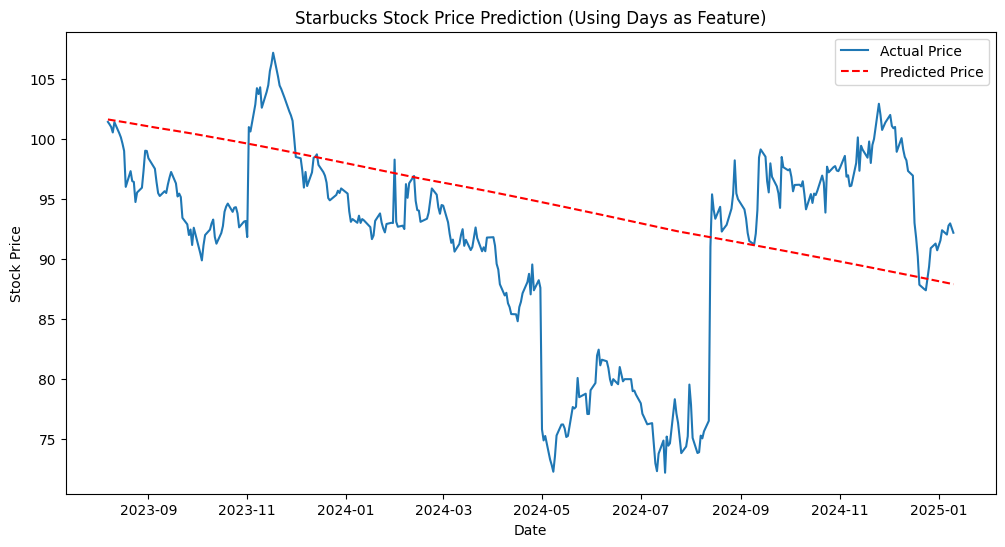

In [65]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data['Date'].iloc[split_index:], y_actual, label='Actual Price')
plt.plot(data['Date'].iloc[split_index:], y_pred, label='Predicted Price', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Starbucks Stock Price Prediction (Using Days as Feature)')
plt.legend()
plt.show()

# 2. Novel Model that considers data as a timeseries

In [66]:
#setting seed for reproducibility (Keras, 2025)
SEED = 44
tf.keras.utils.set_random_seed(SEED)

# Load Data

In [93]:
sb_df = pd.read_csv("./starbucks_open_7year.csv")
print(sb_df.isna().sum()) #verifying no missing data

Unnamed: 0    0
Date          0
Open          0
Time          0
dtype: int64


# Preprocessing the data

In [94]:
#Data prepration
sb_df["Date"] = pd.to_datetime(sb_df["Date"]) #(Joseph, 2022)
sb_df = sb_df.set_index("Date").sort_index() #sorting by date
sb_df["Log_Open"] = np.log(sb_df["Open"]) #(Numpy, 2024) Log transformation as stock prices exhibit exponential growth (Fama, 1965)
data = sb_df["Log_Open"]
sb_df.head()

,Unnamed: 0,Open,Time,Log_Open
Date,,,,
2017-11-13,0,56.81,1.510531e+09,4.039712
2017-11-14,1,56.47,1.510618e+09,4.033710
2017-11-15,2,56.82,1.510704e+09,4.039888
2017-11-16,3,56.92,1.510790e+09,4.041647
2017-11-17,4,57.24,1.510877e+09,4.047253


# Visualizing the data

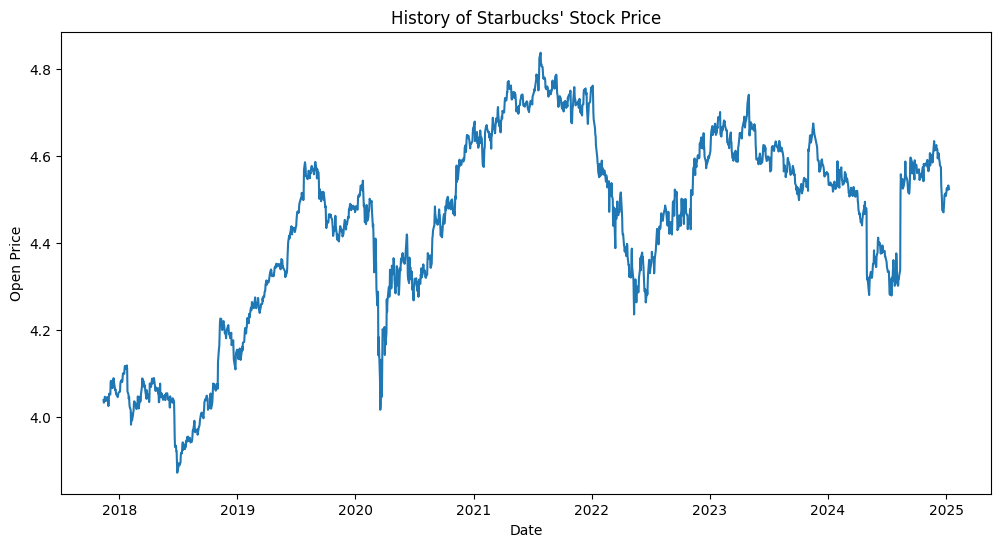

In [69]:
#Visualisation
plt.figure(figsize=(12, 6))
plt.plot(sb_df["Log_Open"])
plt.title("History of Starbucks' Stock Price")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

# Defining the Model and Training (code)

In [95]:
#Normalising data
scaler = MinMaxScaler(feature_range=(0, 1)) #for faster convergence scaled between 0 and 1 (Jeyaraman, 2024)
scaled_data = scaler.fit_transform(sb_df[["Log_Open"]])

#Adding time series sequence
def create_sequences(data, seq_length):
  X, Y = [], []
  for i in range(len(data)- seq_length-1):
    X.append(data[i:(i+seq_length), 0])
    Y.append(data[i+seq_length,0])
  return np.array(X), np.array(Y)

seq_length = 60 #last 2 months used for prediction
X, Y = create_sequences(scaled_data, seq_length)

In [96]:
#train, validate and test split
train_size = 0.7
validation_size = 0.15
test_size = 0.15

train_end = int(len(scaled_data) * train_size)
val_end = int(len(scaled_data)* (train_size + validation_size))

X_train, Y_train = X[:train_end], Y[:train_end]
X_val, Y_val = X[train_end:val_end], Y[train_end:val_end]
X_test, Y_test = X[val_end:], Y[val_end:]

#Reshaping for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print ("Training Data", {X_train.shape}, {Y_train.shape})
print ("Validation Data", {X_val.shape}, {Y_val.shape})
print ("Testing Data", {X_test.shape}, {Y_test.shape})

Training Data {(1260, 60, 1)} {(1260,)}
Validation Data {(270, 60, 1)} {(270,)}
Testing Data {(209, 60, 1)} {(209,)}


In [72]:
#Creating a novel neural network using LSTM layers fro time series forecasting
def novel_model(seq_length):
  model = Sequential()
  model.add(LSTM(100, activation="relu", return_sequences=True, recurrent_dropout=0.2, input_shape=(seq_length, 1)))
  model.add(Dropout(0.2))

  #Second layer
  model.add(LSTM(80,activation ="relu"))
  model.add(Dropout(0.3))

  #Dense layers to further compress the output (gradual reduction)
  model.add(Dense(50, activation="relu", kernel_regularizer=l2(0.01)))
  model.add(Dense(30, activation="relu"))
  model.add(Dense(15, activation="relu"))

  #Output layer
  model.add(Dense(1))
  model.compile(optimizer="adam", loss="mean_squared_error")
  return model

model = novel_model(seq_length)
model.summary()

/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 80)             │        57,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,781 (409.30 KB)

 Trainable params: 104,781 (409.30 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#Fitting and training the model
early_stop = EarlyStopping(monitor="val_loss", patience=7, restore_best_weights=True) #Early stopping to prevent overfitting and stopping the model from memorising training data instead of learning general patterns

history= model.fit(X_train, Y_train, epochs=100,
                   batch_size=32, validation_data=(X_val, Y_val),
                   callbacks=[early_stop],
                   verbose=1
                   )

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.7147 - val_loss: 0.3791
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3355 - val_loss: 0.2149
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.1925 - val_loss: 0.1223
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1092 - val_loss: 0.0691
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0624 - val_loss: 0.0377
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0358 - val_loss: 0.0249
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0220 - val_loss: 0.0135
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0157 - val_loss: 0.0097
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0110 - val_loss: 0.0065
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0093 - val_loss: 0.0048
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0066 - val_loss: 0.0035
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

In [74]:
#Comparing losses
train_loss = model.evaluate(X_train, Y_train)
val_loss = model.evaluate(X_val, Y_val)
test_loss = model.evaluate(X_test, Y_test)

print("Comparing Losses:")
print(f"Train Loss: {train_loss}")
print(f"Validation Loss: {val_loss}")
print(f"Test Loss: {test_loss}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0011    
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026     
Comparing Losses:
Train Loss: 0.0019774476531893015
Validation Loss: 0.0011550678173080087
Test Loss: 0.002780481707304716


In [75]:
#Evaluating scaled data
Y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2= r2_score(Y_test, Y_pred)
mape = mean_absolute_percentage_error(Y_test, Y_pred)

print("Model performance on scaled data:")
print(f"MAE:{mae:.4f}")
print(f"MSE:{mse:.4f}")
print(f"RMSE:{rmse:.4f}")
print(f"R2 Score:{r2:4f}")
print(f"MAPE:{mape:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Model performance on scaled data:
MAE:0.0306
MSE:0.0024
RMSE:0.0491
R2 Score:0.793467
MAPE:0.0512


In [76]:
#Evaluating actual price predictions
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)
test_predict = model.predict(X_test)

#Inversing prediction from vector to actual price to test scores
train_predict = scaler.inverse_transform(train_predict)
Y_train_actual = scaler.inverse_transform(Y_train.reshape(-1,1))
val_predict = scaler.inverse_transform(val_predict)
Y_val_actual = scaler.inverse_transform(Y_val.reshape(-1,1))
test_predict = scaler.inverse_transform(test_predict)
Y_test_actual = scaler.inverse_transform(Y_test.reshape(-1,1))

mae_actual = mean_absolute_error(Y_test_actual, test_predict)
mse_actual = mean_squared_error(Y_test_actual, test_predict)
rmse_actual = np.sqrt(mse_actual)
r2 = r2_score(Y_test_actual, test_predict)
mape = mean_absolute_percentage_error(Y_test_actual, test_predict)

print("Model performance on actual price prediction:")
print(f"MAE: {mae_actual:.4f}")
print(f"MSE: {mse_actual:.4f}")
print(f"RMSE: {rmse_actual:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"MAPE: {mape:.4f}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Model performance on actual price prediction:
MAE: 0.0295
MSE: 0.0022
RMSE: 0.0473
R2 Score: 0.7935
MAPE: 0.0066


In [77]:
#Code for actual prediction
def predict_stock(model, end_sequence, future_days):
  predictions = []
  current_sequence = end_sequence.copy()

  for i in range(future_days):
    current_input = current_sequence.reshape((1, seq_length,1))
    new_prediction = model.predict(current_input)[0,0]
    predictions.append(new_prediction)

    current_sequence = np.roll(current_sequence,-1)
    current_sequence[-1] = new_prediction
  return scaler.inverse_transform(np.array(predictions).reshape(-1,1))

end_sequence = scaled_data[-seq_length:]
future_predictions = predict_stock(model, end_sequence, 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

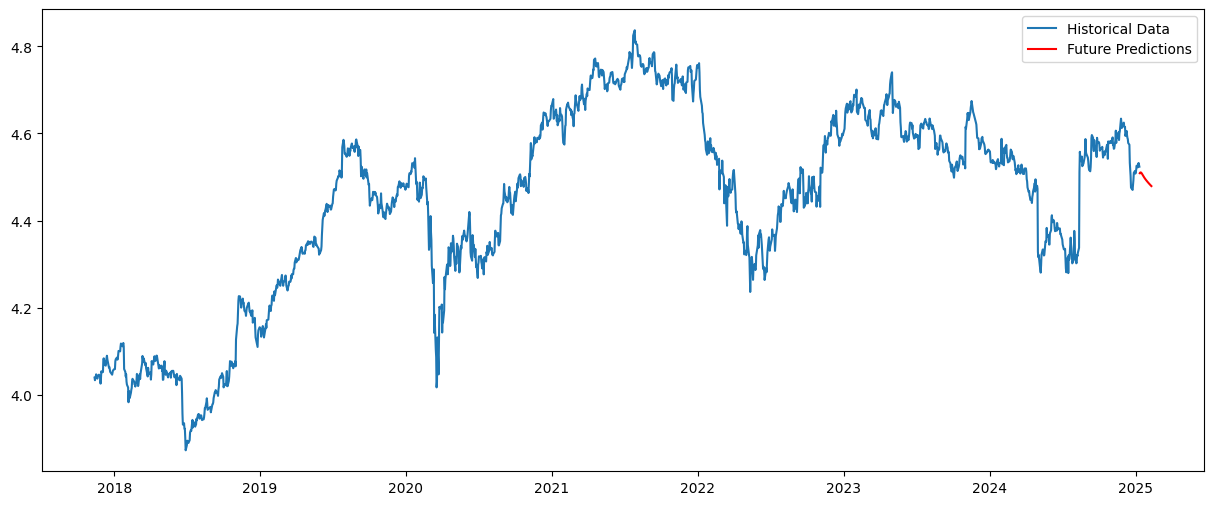

In [78]:
#Ploting future predicitons
plt.figure(figsize=(15, 6))
plt.plot(sb_df.index, sb_df["Log_Open"], label="Historical Data")
future_dates = pd.date_range(start=sb_df.index[-1], periods=31, freq="D")[1:]
plt.plot(future_dates, future_predictions, "r-", label="Future Predictions")
plt.legend()
plt.show()

# 3. Temporal Convolutional Model (TCN) that considers data as a timeseries

# Load Data

In [123]:
# Load the data
tcn_data= pd.read_csv("./starbucks_open_7year.csv")
tcn_data["Date"] = pd.to_datetime(tcn_data["Date"])
tcn_data =tcn_data.set_index("Date").sort_index()
tcn_data["Log_Open"] = np.log(tcn_data["Open"])
value = tcn_data[["Log_Open"]]
tcn_data.head()


,Unnamed: 0,Open,Time,Log_Open
Date,,,,
2017-11-13,0,56.81,1.510531e+09,4.039712
2017-11-14,1,56.47,1.510618e+09,4.033710
2017-11-15,2,56.82,1.510704e+09,4.039888
2017-11-16,3,56.92,1.510790e+09,4.041647
2017-11-17,4,57.24,1.510877e+09,4.047253


# Preprocessing the data

In [124]:
# Checking for missing data
tcn_data.fillna(method='ffill', inplace=True)

# Smoothning the data using a moving average
tcn_data['Log_Open'] = tcn_data['Log_Open'].rolling(window=5).mean().fillna(tcn_data['Log_Open'])


/var/folders/l5/d9yy9npn509bgxww8t72zkqc0000gn/T/ipykernel_52003/3644776741.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tcn_data.fillna(method='ffill', inplace=True)


# Visualizing the data

/var/folders/l5/d9yy9npn509bgxww8t72zkqc0000gn/T/ipykernel_52003/51958841.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


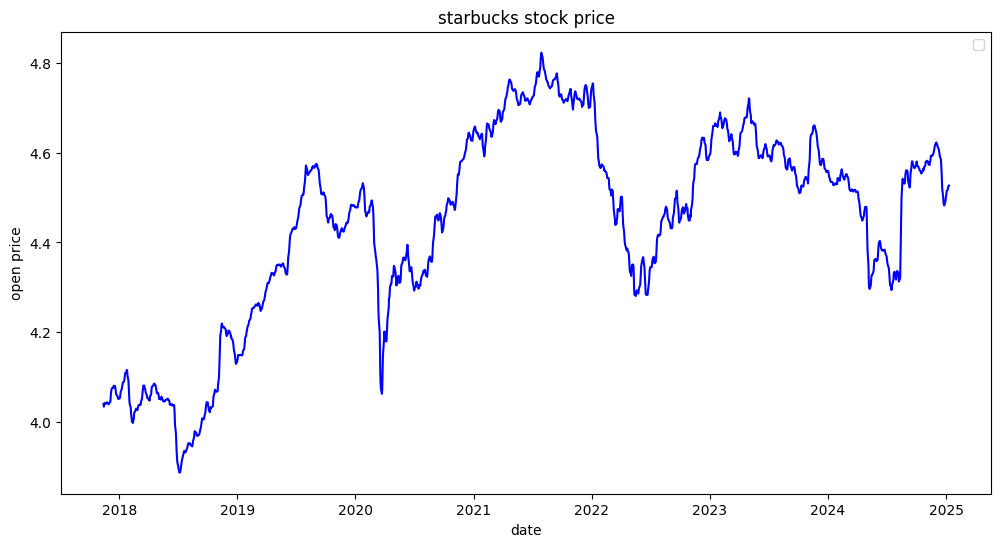

In [125]:
# Visualizing the data
plt.figure(figsize=(12, 6))
plt.plot(tcn_data['Log_Open'], color='blue')
plt.title('starbucks stock price')
plt.xlabel('date')
plt.ylabel('open price')
plt.legend()
plt.show()

# Defining the Model and Training (code)

In [126]:
# Scaling the data
tcn_scaler = MinMaxScaler(feature_range=(0, 1))
tcn_scaled_data = tcn_scaler.fit_transform(data[['Log_Open']])

In [127]:
# Creating sequence
time_step=60
def tcn_create_sequences(data, time_step):
    X_tcn, Y_tcn = [], []
    for i in range(len(data) - time_step-1):
        X_tcn.append(data[i:(i + time_step),0])
        Y_tcn.append(data[i + time_step,0])
    return np.array(X_tcn), np.array(Y_tcn)
X_tcn, Y_tcn = tcn_create_sequences(tcn_scaled_data, time_step)

In [128]:
# Split data into train validate and test
tcn_train_size = 0.6 
tcn_validation_size = 0.2  
tcn_test_size = 0.2 

In [132]:

# Split the data into training,validation and testing
tcn_train_size = int(len(tcn_scaled_data) * tcn_train_size)
tcn_validation_size = int(len(tcn_scaled_data) * tcn_validation_size)
tcn_test_size = len(tcn_scaled_data) - (tcn_train_size + tcn_validation_size)

# Split the data into training, validation, and test sets
tcn_train_data = tcn_scaled_data[:tcn_train_size]
tcn_validation_data = tcn_scaled_data[tcn_train_size:tcn_train_size + tcn_validation_size]
tcn_test_data = tcn_scaled_data[tcn_train_size + tcn_validation_size:]

In [ ]:
# Creating sequences
X_train_tcn, Y_train_tcn = create_sequences(tcn_train_data, time_step)
X_val_tcn, Y_val_tcn = create_sequences(tcn_validation_data, time_step)
X_test_tcn, Y_test_tcn = create_sequences(tcn_test_data, time_step)

In [109]:
# Reshape the data
X_train_tcn = np.reshape(X_train_tcn, (X_train_tcn.shape[0], X_train_tcn.shape[1], 1))
X_val_tcn = np.reshape(X_val_tcn, (X_val_tcn.shape[0], X_val_tcn.shape[1], 1))
X_test_tcn = np.reshape(X_test_tcn, (X_test_tcn.shape[0], X_test_tcn.shape[1], 1))

# Print the shapes of the data sets
print("Training Data:", X_train_tcn.shape, Y_train_tcn.shape)
print("Validation Data:", X_val_tcn.shape, Y_val_tcn.shape)
print("Testing Data:", X_test_tcn.shape, Y_test_tcn.shape)

Training Data: (1019, 60, 1) (1019,)
Validation Data: (299, 60, 1) (299,)
Testing Data: (299, 60, 1) (299,)


In [110]:
# TCN model

tcn_model = Sequential()
tcn_model.add(TCN(input_shape=(X_train_tcn.shape[1], 1),nb_filters=128,kernel_size=3,nb_stacks=1,dilations=[1,2,4,8,16]))
tcn_model.add(Dropout(0.1))
tcn_model.add(Dense(1))
tcn_model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(), metrics=['accuracy'])


/Users/reghunotraghu/Documents/college_projects/dl-group-project/.venv/lib/python3.9/site-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


In [111]:
# Training the model
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

lr_scheduler=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=5,min_lr=1e-4,verbose=1)

tcn_model.fit(X_train_tcn,Y_train_tcn,
          epochs=100,
          batch_size=32,
          validation_data=(X_val, Y_val),
          callbacks=[lr_scheduler])


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 6.1600e-04 - loss: 4.1804 - val_accuracy: 0.0000e+00 - val_loss: 0.0031 - learning_rate: 0.0010
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0035 - loss: 0.1224 - val_accuracy: 0.0000e+00 - val_loss: 0.0134 - learning_rate: 0.0010
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0035 - loss: 0.0261 - val_accuracy: 0.0000e+00 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0035 - loss: 0.0160 - val_accuracy: 0.0000e+00 - val_loss: 0.0012 - learning_rate: 0.0010
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0035 - loss: 0.0106 - val_accuracy: 0.0000e+00 - val_loss: 7.3513e-04 - learning_rate: 0.0010
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.0035 - loss: 0.0075 - val_accuracy: 0.0000e+00 - val_loss: 7.2206e-04 - learning_rate: 0.0010
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step 

In [112]:
test_loss = tcn_model.evaluate(X_test_tcn, Y_test_tcn)
train_loss = tcn_model.evaluate(X_train_tcn, Y_train_tcn)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0000e+00 - loss: 5.9962e-05
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0023 - loss: 2.0938e-05


In [117]:
#evaluation on scaled data
y_pred = tcn_model.predict(X_test_tcn)

mae = mean_absolute_error(Y_test_tcn, y_pred)
mse = mean_squared_error(Y_test_tcn, y_pred)
mape = mean_absolute_percentage_error(Y_test_tcn, y_pred)
r2 = r2_score(Y_test_tcn, y_pred)

print(f"Scaled MAE: {mae:.4f}")
print(f"Scaled MSE: {mse:.4f}")
print(f"Scaled MAPE: {mape:.4f}")
print(f"Scaled R2 Score: {r2:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Scaled MAE: 0.0087
Scaled MSE: 0.0001
Scaled MAPE: 0.0142
Scaled R2 Score: 0.9865


In [ ]:
#evaluating actual price predictions

y_pred_actual_tcn = scaler.inverse_transform(y_pred)
Y_test_actual_tcn = scaler.inverse_transform(Y_test_tcn.reshape(-1, 1))
mae_actual = mean_absolute_error(Y_test_actual, y_pred_actual)
mse_actual = mean_squared_error(Y_test_actual, y_pred_actual)
mape_actual = mean_absolute_percentage_error(Y_test_actual, y_pred_actual)

In [119]:
print(f'Actual MAE: {mae_actual:.4f}')
print(f'Actual MSE: {mse_actual:.4f}')
print(f'Actual MAPE: {mape_actual:.4f}')

Actual MAE: 0.0081
Actual MSE: 0.0001
Actual MAPE: 0.0018


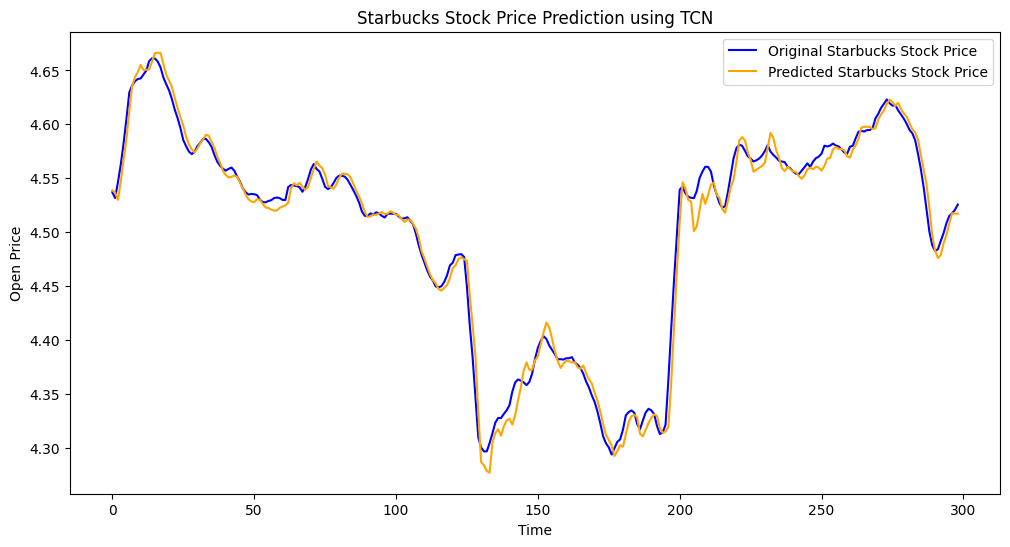

In [120]:
plt.figure(figsize=(12,6))
plt.plot(Y_test_actual, label='Original Starbucks Stock Price', color='blue')
plt.plot(y_pred_actual, label='Predicted Starbucks Stock Price', color='orange')
plt.title('Starbucks Stock Price Prediction using TCN')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [121]:
#actual prediction
def predict_stock(tcn_model, last_sequence, future_days):
  predictions = []
  current_sequence = last_sequence.copy()

  for i in range(future_days):
    current_input = current_sequence.reshape((1, time_step,1))
    next_prediction = tcn_model.predict(current_input)[0,0]
    predictions.append(next_prediction)

    current_sequence = np.roll(current_sequence,-1)
    current_sequence[-1] = next_prediction
  return scaler.inverse_transform(np.array(predictions).reshape(-1,1))

last_sequence = scaled_data[-time_step:]
future_predictions = predict_stock(tcn_model, last_sequence, 30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

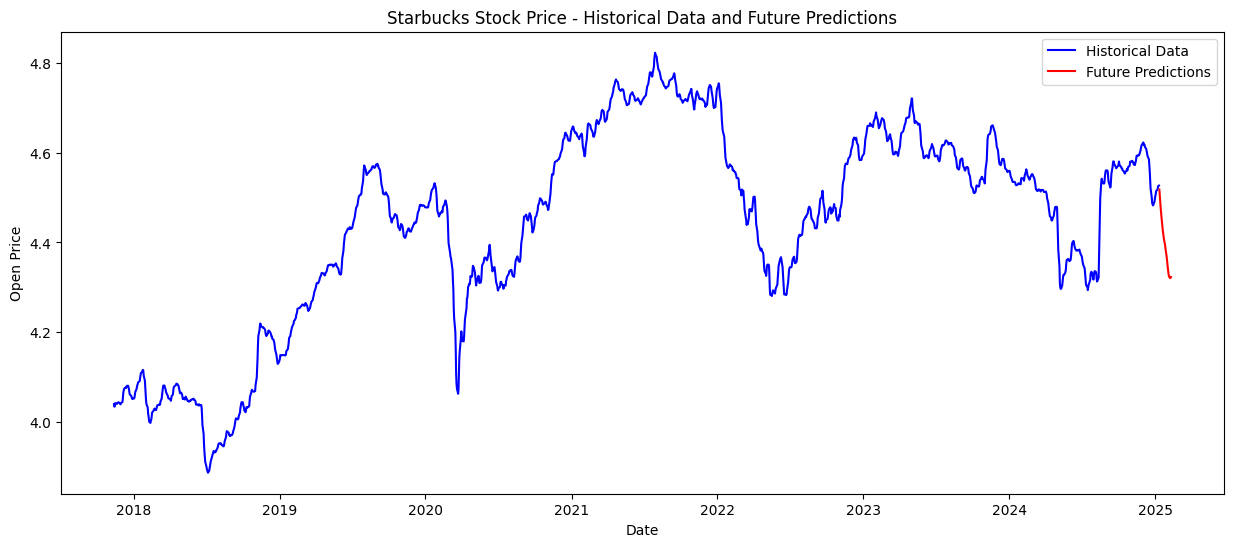

In [122]:
plt.figure(figsize=(15, 6))
plt.plot(data.index,data["Log_Open"], label="Historical Data", color= 'blue')
future_dates = pd.date_range(start=data.index[-1], periods=31, freq="D")[1:]
plt.plot(future_dates, future_predictions, "r-", label="Future Predictions")
plt.title('Starbucks Stock Price - Historical Data and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

# 4. Model that considers data as regression model

In [135]:
#Set seeds for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

# Load Data (code)

In [136]:
# Load Data
df = pd.read_csv('./starbucks_open_7year.csv')

# Preprocessing the data

In [139]:
df.ffill(inplace=True)
df['Log_Open'] = np.log(df['Open'])

In [140]:
# Smooth the data
df['Smoothed_Log_Open'] = df['Log_Open'].rolling(window=3).mean().fillna(df['Log_Open'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
df.dropna(subset=['Date'], inplace=True)
df.set_index('Date', inplace=True)

# Visualizing the data

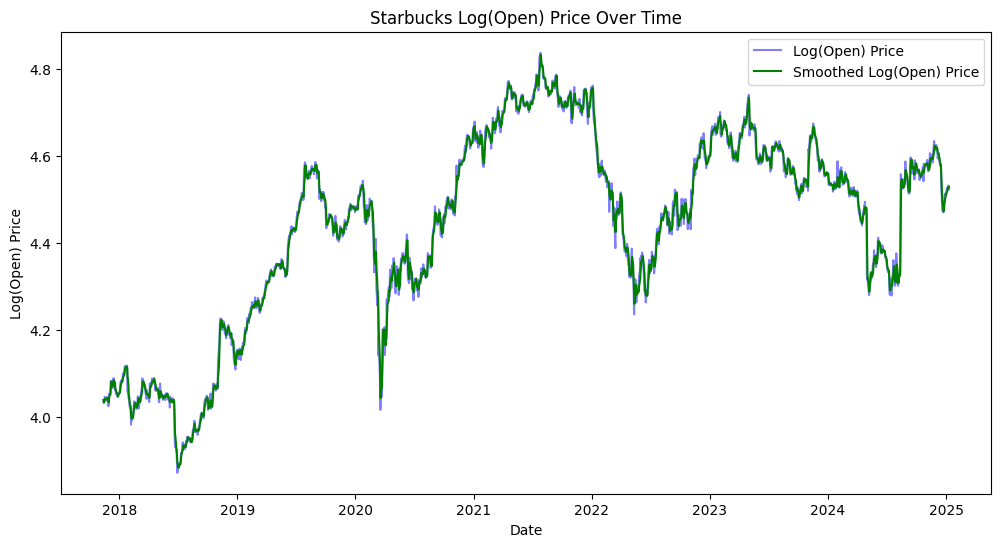

In [141]:
# Visualizing
plt.figure(figsize=(12, 6))
plt.plot(df['Log_Open'], label='Log(Open) Price', color='blue', alpha=0.5)
plt.plot(df['Smoothed_Log_Open'], label='Smoothed Log(Open) Price', color='green')
plt.title('Starbucks Log(Open) Price Over Time')
plt.xlabel('Date')
plt.ylabel('Log(Open) Price')
plt.legend()
plt.show()

# Defining the Model and Training (code)

In [ ]:
# Scaling the data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Smoothed_Log_Open']])

In [ ]:
# Creating features
def create_lag_features(data, window=30):
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_lag_features(scaled, window=30)

In [ ]:
#Train,Validation,Test split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

#reshape
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
#Building an improved DNN model(Regression Model)
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_flat.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

In [ ]:
#Training the model
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(
    X_train_flat, y_train,
    validation_data=(X_val_flat, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

In [ ]:
y_pred_scaled = model.predict(X_test_flat)

#Scaled prediction
metrics = {
    'MAE': mean_absolute_error(y_test, y_pred_scaled),
    'MSE': mean_squared_error(y_test, y_pred_scaled),
    'R²': r2_score(y_test, y_pred_scaled),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_scaled)
}

print("\n[Scaled Evaluation]")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

In [ ]:
#Actual predictions
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_actual = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

inv_metrics = {
    'MAE': mean_absolute_error(y_test_actual, y_pred_actual),
    'MSE': mean_squared_error(y_test_actual, y_pred_actual),
    'R²': r2_score(y_test_actual, y_pred_actual),
    'MAPE': mean_absolute_percentage_error(y_test_actual, y_pred_actual)
}

print("\n[Inverse Scaled Evaluation]")
for metric, value in inv_metrics.items():
    print(f"{metric}: {value:.4f}")

In [ ]:
#Plot training history
plt.figure(figsize=(12, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot Actual and predicted price
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(y_pred_actual, label='Predicted Price', color='orange')
plt.title('Starbucks Log(Open) Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()